In [72]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import custom_transformers as ct
import data_functions as dfun

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from copy import deepcopy

import itertools

from statistics import mean

from imblearn.over_sampling import SMOTE

In [4]:
x_train, x_test, y_train = dfun.get_dataframes()

x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_train_nums= x_train.select_dtypes(exclude="object")
x_train_cat= x_train.select_dtypes(include="object")
ohe=OneHotEncoder(drop='first', sparse=False)
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train_cat), columns= ohe.get_feature_names(x_train_cat.columns), index= x_train_cat.index)
si=SimpleImputer()
x_nums_si=pd.DataFrame(si.fit_transform(x_train_nums), index= x_train_nums.index, columns= x_train_nums.columns)
scale= StandardScaler()
x_train_nums_scaled= pd.DataFrame(scale.fit_transform(x_nums_si), index= x_nums_si.index, columns= x_nums_si.columns)
x_final= x_train_nums_scaled.join(x_train_ohe)

In [5]:
x_final.head()

,amount_tsh,gps_height,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,...,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,1.895665,1.041252,-0.150399,0.733857,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8776,-0.105970,1.054237,0.212290,0.745416,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34310,-0.097630,0.025541,0.148660,0.744365,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67743,-0.105970,-0.584751,-0.258570,0.720196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19728,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x_val, x_val_test, y_val, y_val_test= train_test_split(x_final, y_train, random_state=2020)

bin_y = lambda x: 1 if x == 'functional' else 0
y_val = y_val['status_group'].apply(bin_y)
y_val_test = y_val_test['status_group'].apply(bin_y)

# skip to next comment to avoid running gridseach

In [19]:
param_grid = {'n_estimators': [100, 200],
              'min_samples_leaf': [1, 5, 7],
              'max_features': [100, 'auto'],
              'max_depth': [5, None]
             }
gscv = GridSearchCV(RandomForestClassifier(), param_grid, verbose = 3)
gscv.fit(x_val, y_val.values)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100, score=0.730, total=   7.4s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100, score=0.733, total=   7.1s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.5s remaining:    0.0s


[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100, score=0.731, total=   7.3s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100 
[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100, score=0.737, total=   7.1s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100 
[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=100, score=0.739, total=   7.1s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=200, score=0.728, total=  14.3s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=200, score=0.732, total=  13.9s
[CV] max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=5, max_features=100, min_samples_leaf=1, n_estimators=200, score=0.733, total=  13.8s
[CV] max_depth=5, 

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=200, score=0.716, total=   2.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100, score=0.715, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100, score=0.711, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100, score=0.713, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100, score=0.723, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=7, n_estimators=100, score=0.719, total=   1.5s
[CV] ma

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200, score=0.797, total=  23.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200, score=0.800, total=  24.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200, score=0.807, total=  22.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200, score=0.815, total=  22.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=200, score=0.805, total=  22.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=5, n_estimators=100, s

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 33.6min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, None], 'max_features': [100, 'auto'],
                         'min_samples_leaf': [1, 5, 7],
                         'n_estimators': [100, 200]},
             verbose=3)

In [34]:
gridsearch_model = gscv.best_estimator_

In [35]:
gridsearch_model

RandomForestClassifier(max_features=100, min_samples_leaf=5, n_estimators=200)

# start here if you don't want to use gridsearch

In [36]:
best_random_forest = RandomForestClassifier(max_features = 100, min_samples_leaf = 5, n_estimators = 200)

In [37]:
best_random_forest.fit(x_val, y_val)

RandomForestClassifier(max_features=100, min_samples_leaf=5, n_estimators=200)

In [31]:
feature_importance_df = pd.DataFrame(list(zip(x_val.columns, best_random_forest.feature_importances_)), columns = ['feature', 'importance'])

In [33]:
feature_importance_df.sort_values(['importance'], ascending = False).head(15)

,feature,importance
1,gps_height,0.094438
205,waterpoint_type_other,0.083774
3,construction_year,0.080189
2,population,0.058277
161,extraction_type_group_other,0.046161
190,quantity_group_enough,0.044648
186,quantity_enough,0.041221
192,quantity_group_seasonal,0.036524
0,amount_tsh,0.036519
188,quantity_seasonal,0.028183


In [39]:
confusion_matrix(y_val_test, best_random_forest.predict(x_val_test))

array([[4949, 1891],
       [ 988, 7022]])

In [41]:
print(classification_report(y_val_test, best_random_forest.predict(x_val_test)))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      6840
           1       0.79      0.88      0.83      8010

    accuracy                           0.81     14850
   macro avg       0.81      0.80      0.80     14850
weighted avg       0.81      0.81      0.80     14850



In [42]:
best_random_forest.score(x_val_test, y_val_test)

0.8061279461279461

# performing a second gridsearch

In [47]:
best_random_forest

RandomForestClassifier(max_features=100, min_samples_leaf=5, n_estimators=200)

In [48]:
param_grid = {'n_estimators': [175, 200, 225, 300],
              'min_samples_leaf': [3, 4, 5, 6],
              'max_features': [75, 100, 125]
             }
gscv = GridSearchCV(RandomForestClassifier(), param_grid, verbose = 3)
gscv.fit(x_val, y_val.values)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_features=75, min_samples_leaf=3, n_estimators=175 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=75, min_samples_leaf=3, n_estimators=175, score=0.804, total=  34.2s
[CV] max_features=75, min_samples_leaf=3, n_estimators=175 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.3s remaining:    0.0s


[CV]  max_features=75, min_samples_leaf=3, n_estimators=175, score=0.807, total=  33.9s
[CV] max_features=75, min_samples_leaf=3, n_estimators=175 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  max_features=75, min_samples_leaf=3, n_estimators=175, score=0.807, total=  31.4s
[CV] max_features=75, min_samples_leaf=3, n_estimators=175 ...........
[CV]  max_features=75, min_samples_leaf=3, n_estimators=175, score=0.817, total=  33.1s
[CV] max_features=75, min_samples_leaf=3, n_estimators=175 ...........
[CV]  max_features=75, min_samples_leaf=3, n_estimators=175, score=0.809, total=  34.0s
[CV] max_features=75, min_samples_leaf=3, n_estimators=200 ...........
[CV]  max_features=75, min_samples_leaf=3, n_estimators=200, score=0.807, total=  37.4s
[CV] max_features=75, min_samples_leaf=3, n_estimators=200 ...........
[CV]  max_features=75, min_samples_leaf=3, n_estimators=200, score=0.808, total=  38.0s
[CV] max_features=75, min_samples_leaf=3, n_estimators=200 ...........
[CV]  max_features=75, min_samples_leaf=3, n_estimators=200, score=0.808, total=  38.3s
[CV] max_features=75, min_samples_leaf=3, n_estimators=200 ...........
[CV]  max_features=75, min_samples_leaf=3, n_e

[CV]  max_features=75, min_samples_leaf=5, n_estimators=225, score=0.804, total=  41.2s
[CV] max_features=75, min_samples_leaf=5, n_estimators=300 ...........
[CV]  max_features=75, min_samples_leaf=5, n_estimators=300, score=0.802, total=  54.0s
[CV] max_features=75, min_samples_leaf=5, n_estimators=300 ...........
[CV]  max_features=75, min_samples_leaf=5, n_estimators=300, score=0.806, total=  54.1s
[CV] max_features=75, min_samples_leaf=5, n_estimators=300 ...........
[CV]  max_features=75, min_samples_leaf=5, n_estimators=300, score=0.803, total=  53.6s
[CV] max_features=75, min_samples_leaf=5, n_estimators=300 ...........
[CV]  max_features=75, min_samples_leaf=5, n_estimators=300, score=0.815, total=  52.9s
[CV] max_features=75, min_samples_leaf=5, n_estimators=300 ...........
[CV]  max_features=75, min_samples_leaf=5, n_estimators=300, score=0.803, total=  54.6s
[CV] max_features=75, min_samples_leaf=6, n_estimators=175 ...........
[CV]  max_features=75, min_samples_leaf=6, n_e

[CV]  max_features=100, min_samples_leaf=4, n_estimators=200, score=0.806, total=  47.4s
[CV] max_features=100, min_samples_leaf=4, n_estimators=200 ..........
[CV]  max_features=100, min_samples_leaf=4, n_estimators=200, score=0.805, total=  46.5s
[CV] max_features=100, min_samples_leaf=4, n_estimators=200 ..........
[CV]  max_features=100, min_samples_leaf=4, n_estimators=200, score=0.815, total=  53.1s
[CV] max_features=100, min_samples_leaf=4, n_estimators=200 ..........
[CV]  max_features=100, min_samples_leaf=4, n_estimators=200, score=0.805, total=  51.1s
[CV] max_features=100, min_samples_leaf=4, n_estimators=225 ..........
[CV]  max_features=100, min_samples_leaf=4, n_estimators=225, score=0.805, total=  54.6s
[CV] max_features=100, min_samples_leaf=4, n_estimators=225 ..........
[CV]  max_features=100, min_samples_leaf=4, n_estimators=225, score=0.805, total=  53.7s
[CV] max_features=100, min_samples_leaf=4, n_estimators=225 ..........
[CV]  max_features=100, min_samples_leaf

[CV]  max_features=100, min_samples_leaf=6, n_estimators=300, score=0.814, total= 1.2min
[CV] max_features=100, min_samples_leaf=6, n_estimators=300 ..........
[CV]  max_features=100, min_samples_leaf=6, n_estimators=300, score=0.802, total= 1.2min
[CV] max_features=125, min_samples_leaf=3, n_estimators=175 ..........
[CV]  max_features=125, min_samples_leaf=3, n_estimators=175, score=0.806, total=  56.2s
[CV] max_features=125, min_samples_leaf=3, n_estimators=175 ..........
[CV]  max_features=125, min_samples_leaf=3, n_estimators=175, score=0.804, total=  57.8s
[CV] max_features=125, min_samples_leaf=3, n_estimators=175 ..........
[CV]  max_features=125, min_samples_leaf=3, n_estimators=175, score=0.805, total=  52.3s
[CV] max_features=125, min_samples_leaf=3, n_estimators=175 ..........
[CV]  max_features=125, min_samples_leaf=3, n_estimators=175, score=0.818, total=  54.7s
[CV] max_features=125, min_samples_leaf=3, n_estimators=175 ..........
[CV]  max_features=125, min_samples_leaf

[CV]  max_features=125, min_samples_leaf=5, n_estimators=225, score=0.804, total= 1.1min
[CV] max_features=125, min_samples_leaf=5, n_estimators=225 ..........
[CV]  max_features=125, min_samples_leaf=5, n_estimators=225, score=0.806, total= 1.2min
[CV] max_features=125, min_samples_leaf=5, n_estimators=225 ..........
[CV]  max_features=125, min_samples_leaf=5, n_estimators=225, score=0.802, total= 1.1min
[CV] max_features=125, min_samples_leaf=5, n_estimators=225 ..........
[CV]  max_features=125, min_samples_leaf=5, n_estimators=225, score=0.816, total=  59.5s
[CV] max_features=125, min_samples_leaf=5, n_estimators=225 ..........
[CV]  max_features=125, min_samples_leaf=5, n_estimators=225, score=0.804, total= 1.1min
[CV] max_features=125, min_samples_leaf=5, n_estimators=300 ..........
[CV]  max_features=125, min_samples_leaf=5, n_estimators=300, score=0.804, total= 1.5min
[CV] max_features=125, min_samples_leaf=5, n_estimators=300 ..........
[CV]  max_features=125, min_samples_leaf

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 253.7min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [75, 100, 125],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'n_estimators': [175, 200, 225, 300]},
             verbose=3)

In [56]:
gscv.best_estimator_

RandomForestClassifier(max_features=75, min_samples_leaf=3, n_estimators=200)

In [63]:
new_best = RandomForestClassifier(max_features = 75, min_samples_leaf = 3, n_estimators = 200)

In [64]:
new_best.fit(x_val, y_val)

RandomForestClassifier(max_features=75, min_samples_leaf=3, n_estimators=200)

In [65]:
new_best.score(x_val_test, y_val_test)

0.8084848484848485

In [67]:
print(classification_report(y_val_test, new_best.predict(x_val_test)))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      6840
           1       0.79      0.87      0.83      8010

    accuracy                           0.81     14850
   macro avg       0.81      0.80      0.81     14850
weighted avg       0.81      0.81      0.81     14850



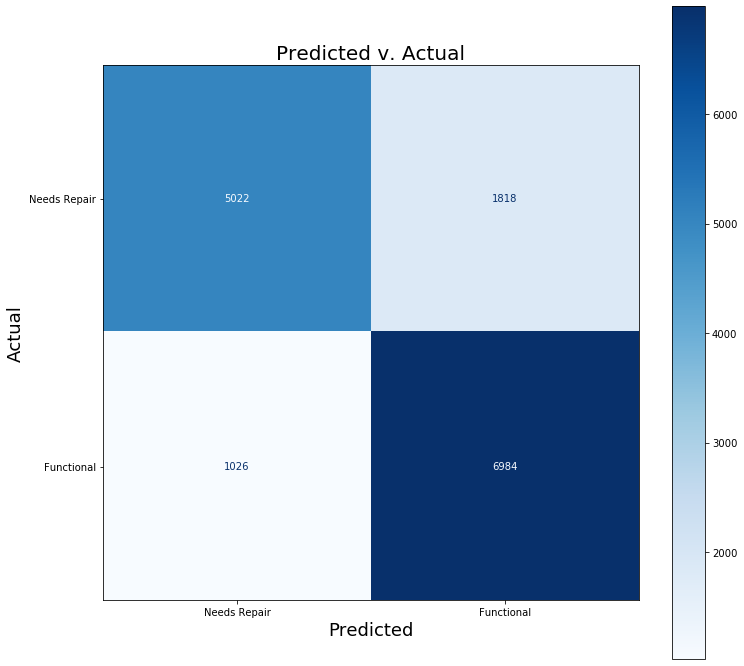

In [74]:
fig, ax= plt.subplots(figsize=(12,12))
plot_confusion_matrix(new_best, x_val_test, y_val_test, display_labels=['Needs Repair', 'Functional'], ax = ax, cmap=plt.cm.Blues)
plt.title('Predicted v. Actual', fontsize = 20)
ax.grid(False)
plt.xlabel('Predicted', fontsize = 18)
plt.ylabel('Actual', fontsize = 18)
plt.savefig('confusion_matrix_test.png', transparent = True)
plt.show()